In [2]:
import sys
sys.path.append('../')
from sensors import Camera
import matplotlib.pyplot as plt
from PIL import Image
import open3d as o3d
import numpy as np
import pykitti
import time
import cv2

np.set_printoptions(suppress=True, precision=2)


DATA_DIR = '/home/loay/Documents/datasets/kitti/raw'
DATE = '2011_09_26'
DRIVE_SCENE = '0020'
kittiData = pykitti.raw(DATA_DIR, DATE, DRIVE_SCENE)
imgArr = np.asarray(kittiData.get_cam2(0))
# pcArr = kittiData.get_velo(0)[:, :3]
Pmtx = kittiData.calib.P_rect_20
Kmtx = kittiData.calib.K_cam2
Tmtx = kittiData.calib.T_cam2_velo
imgH, imgW = imgArr.shape[:2]
cam = Camera(imgW, imgH, Kmtx, Tmtx)

print("img-size: ", (imgW, imgH), "\t", "P-size: ", Pmtx.shape)
print("K-size: ", cam.K.shape, "\t", "Rt-size: ", cam.T.shape)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
img-size:  (1242, 375) 	 P-size:  (3, 4)
K-size:  (3, 3) 	 Rt-size:  (4, 4)


BFMatcher runtime: 330.64 (ms)


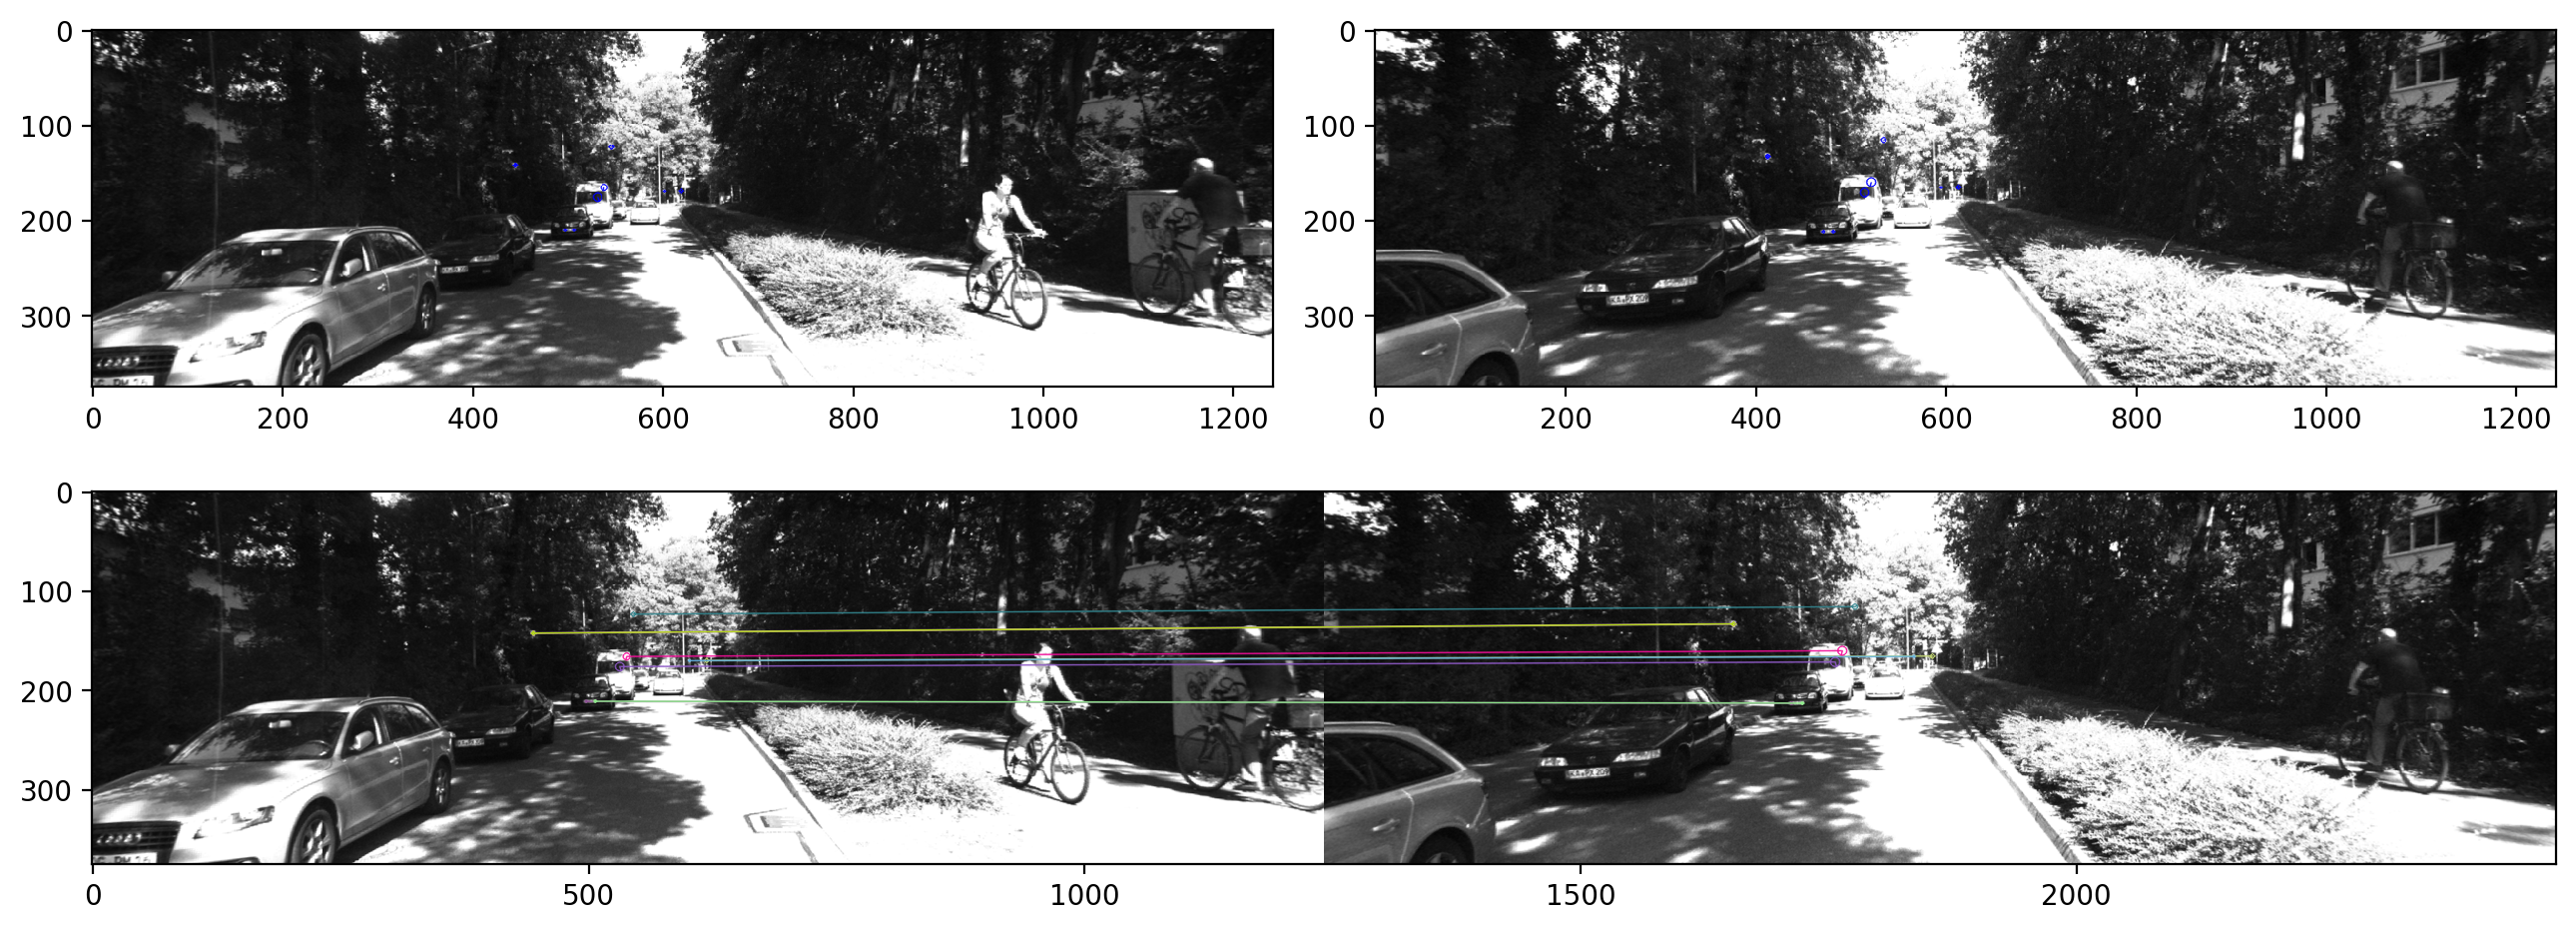

In [8]:
imgArr1 = np.asarray(kittiData.get_cam2(0))
imgArr2 = np.asarray(kittiData.get_cam2(10))
grayArr1 = cv2.cvtColor(imgArr1, cv2.COLOR_RGB2GRAY)
grayArr2 = cv2.cvtColor(imgArr2, cv2.COLOR_RGB2GRAY)

sift = cv2.SIFT_create(nfeatures=500, contrastThreshold=0.15, edgeThreshold=15, nOctaveLayers=5)
bfMatcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # double match and doubls runtime

t1 = time.perf_counter()
kpts1, desc1 = sift.detectAndCompute(grayArr1, None)
kpts2, desc2 = sift.detectAndCompute(grayArr2, None)

matches = bfMatcher.match(desc1, desc2)
sortedMatches = sorted(matches, key=lambda x: x.distance)   # (1 to 1) min L2 is better
t2 = time.perf_counter()
print(f"BFMatcher runtime: {(t2 -t1)*1000:0.2f} (ms)")

bestKpts1 = []
bestKpts2 = []
for match in sortedMatches[:10]:
    # extracts matched ids from match object
    bestKpts1.append(kpts1[match.queryIdx])
    bestKpts2.append(kpts2[match.trainIdx])

# visualize best 10 matched keypoint
flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS + cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
outImg1 = cv2.drawKeypoints(grayArr1, bestKpts1, None, flags=flags, color=(0, 0, 255))
outImg2 = cv2.drawKeypoints(grayArr2, bestKpts2, None, flags=flags, color=(0, 0, 255))
matchImg = cv2.drawMatches(grayArr1, kpts1, grayArr2, kpts2, sortedMatches[:10], outImg=None, flags=flags)

fig = plt.figure(figsize=(13, 5), dpi=200, tight_layout=True)
gridSpec = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gridSpec[0, 0])
ax.imshow(outImg1)
# ---------------------
ax = fig.add_subplot(gridSpec[0, 1])
ax.imshow(outImg2)
# ---------------------
ax = fig.add_subplot(gridSpec[1, :])
ax.imshow(matchImg)

plt.tight_layout()

BFMatcher runtime: 52.36 (ms)


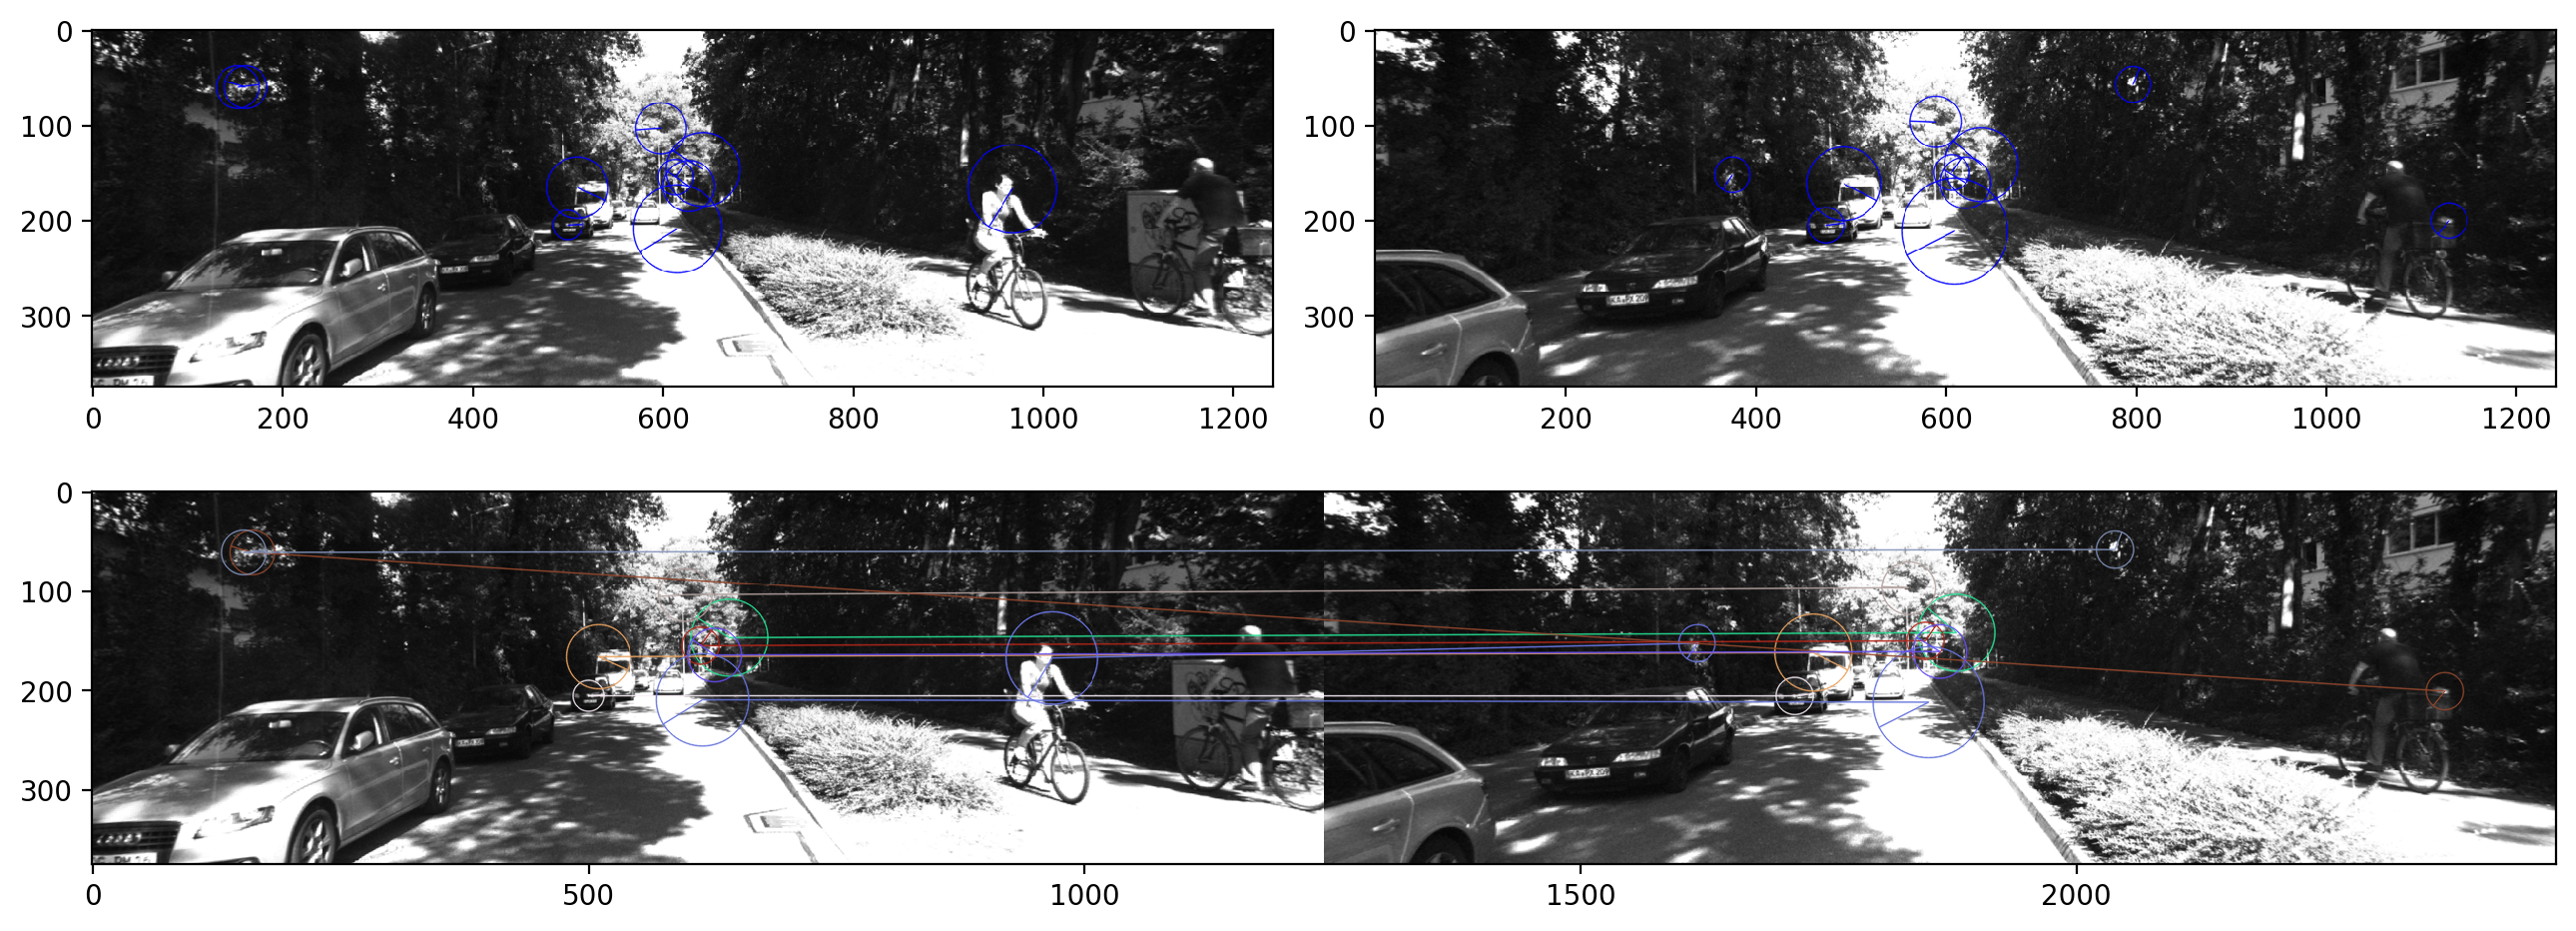

In [9]:
imgArr1 = np.asarray(kittiData.get_cam2(0))
imgArr2 = np.asarray(kittiData.get_cam2(10))
grayArr1 = cv2.cvtColor(imgArr1, cv2.COLOR_RGB2GRAY)
grayArr2 = cv2.cvtColor(imgArr2, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create()
bfMatcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True) # double match and doubls runtime

t1 = time.perf_counter()
kpts1, desc1 = orb.detectAndCompute(grayArr1, None)
kpts2, desc2 = orb.detectAndCompute(grayArr2, None)

matches = bfMatcher.match(desc1, desc2)
sortedMatches = sorted(matches, key=lambda x: x.distance)   # (1 to 1) min L2 is better
t2 = time.perf_counter()
print(f"BFMatcher runtime: {(t2 -t1)*1000:0.2f} (ms)")

bestKpts1 = []
bestKpts2 = []
for match in sortedMatches[:10]:
    # extracts matched ids from match object
    bestKpts1.append(kpts1[match.queryIdx])
    bestKpts2.append(kpts2[match.trainIdx])

# visualize best 10 matched keypoint
flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS + cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
outImg1 = cv2.drawKeypoints(grayArr1, bestKpts1, None, flags=flags, color=(0, 0, 255))
outImg2 = cv2.drawKeypoints(grayArr2, bestKpts2, None, flags=flags, color=(0, 0, 255))
matchImg = cv2.drawMatches(grayArr1, kpts1, grayArr2, kpts2, sortedMatches[:10], outImg=None, flags=flags)

fig = plt.figure(figsize=(13, 5), dpi=200, tight_layout=True)
gridSpec = fig.add_gridspec(2, 2)
ax = fig.add_subplot(gridSpec[0, 0])
ax.imshow(outImg1)
# ---------------------
ax = fig.add_subplot(gridSpec[0, 1])
ax.imshow(outImg2)
# ---------------------
ax = fig.add_subplot(gridSpec[1, :])
ax.imshow(matchImg)

plt.tight_layout()

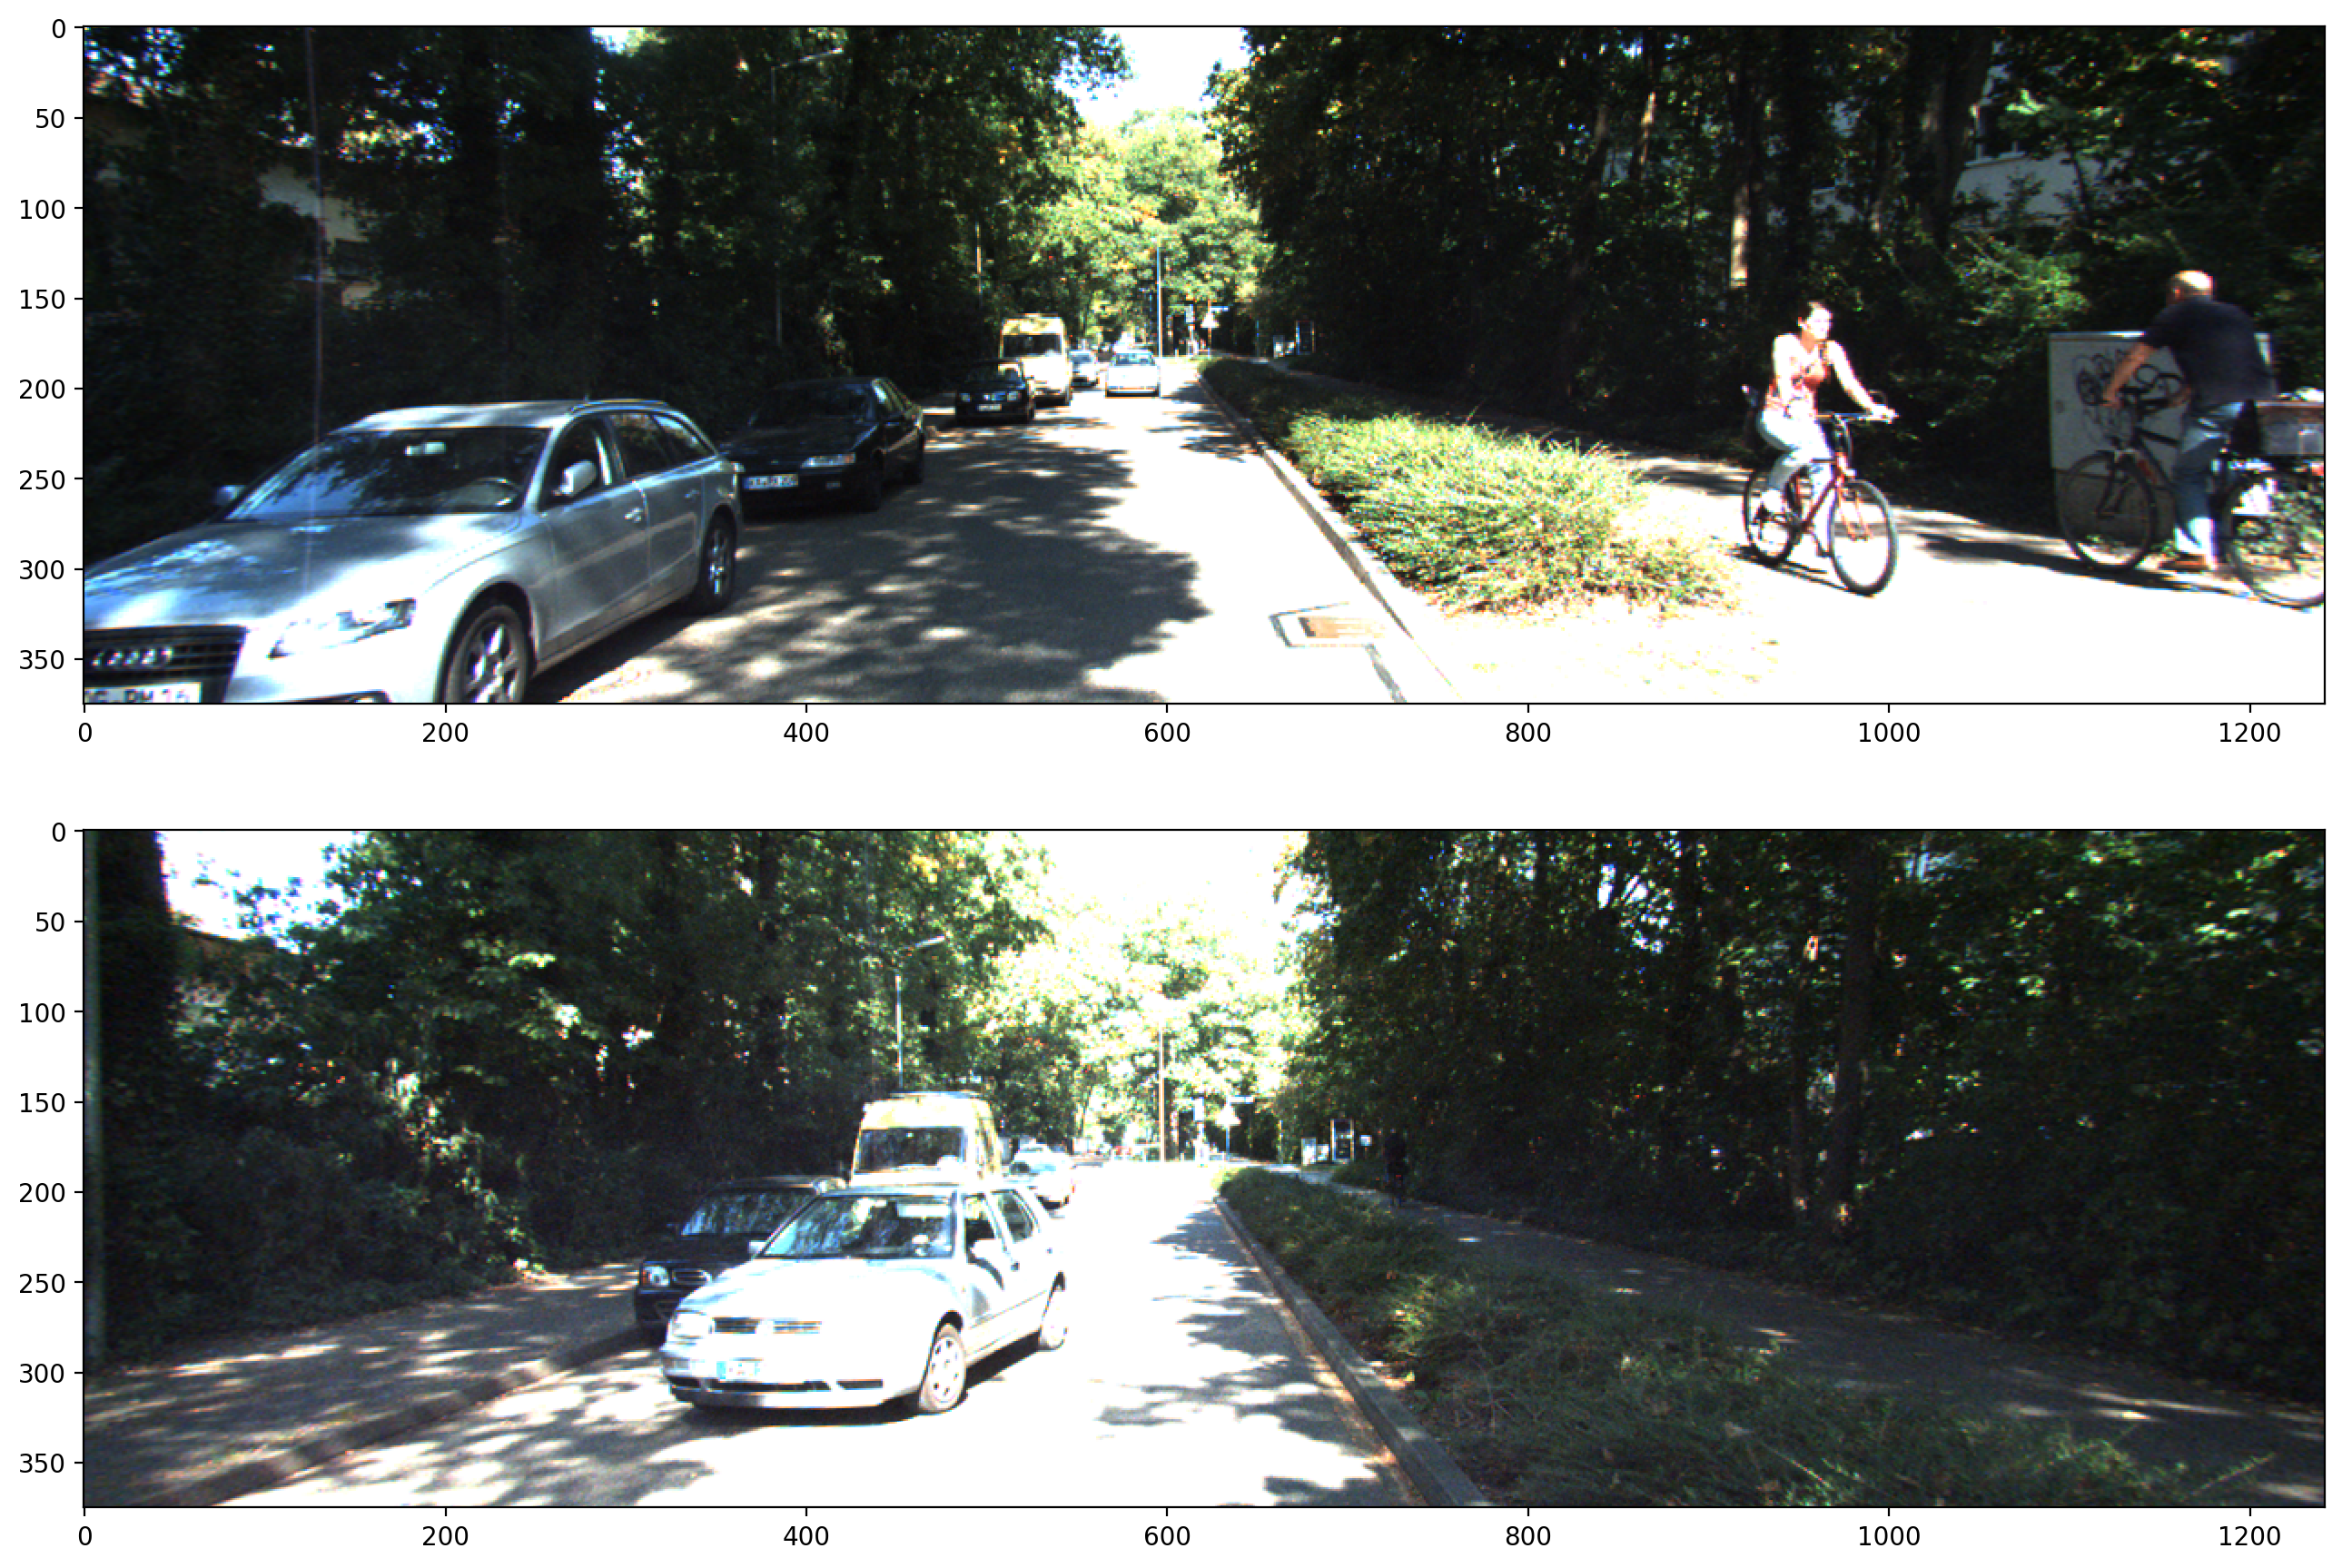

In [12]:
imgArr1 = np.asarray(kittiData.get_cam2(0))
imgArr2 = np.asarray(kittiData.get_cam2(50))
imgArr3 = np.asarray(kittiData.get_cam2(80))

fig = plt.figure(figsize=(13, 9), dpi=200, tight_layout=True)
gridSpec = fig.add_gridspec(2, 2)
ax = plt.subplot(211)
ax.imshow(imgArr1)
# -------------------
# ax = plt.subplot(312)
# ax.imshow(imgArr2)
# -------------------
ax = plt.subplot(212)
ax.imshow(imgArr3)